<a href="https://colab.research.google.com/github/MayarAtef16/Face-Detection-Clustering-and-Recognition/blob/main/Face_Detection%2C_Clustering_and_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 2.3 MB 39.1 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=8e91a739470321e8e1a8301d24a2dd53f903351721805e79abd01da9036f3f86
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [ ]:
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import timeit
import pathlib
import cv2
import numpy as np

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unrar x "/content/clustersevaluationdataset.rar" "/content"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/clustersevaluationdataset.rar

Creating    /content/clustersevaluationdataset                        OK
Creating    /content/clustersevaluationdataset/0                      OK
Extracting  /content/clustersevaluationdataset/0/19.jpg                    4%  OK 
Extracting  /content/clustersevaluationdataset/0/20.jpg                    9%  OK 
Extracting  /content/clustersevaluationdataset/0/21.jpg                   14%  OK 
Extracting  /content/clustersevaluationdataset/0/22.jpg                   19%  OK 
Extracting  /content/clustersevaluationdataset/0/23.jpg                   24%  OK 
Extracting  /content/clustersevaluationdataset/0/42.jpg                   28%  OK 
Extracting  /content/clustersevaluationdataset/0/44.jpg                   33%  OK 
Extracting  /content/clustersevaluationdataset/0/48.jpg                   37%

In [ ]:
!unrar x "/content/evaluation dataset.rar" "/content"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open /content/evaluation dataset.rar
No such file or directory
No files to extract


In [ ]:
dp="/content/H5"
imagepaths=os.listdir(dp)
images=[]
for i in imagepaths:
    if i.endswith('jpg'):
        x=os.path.abspath(os.path.join(dp,i))
        images.append(x)

In [ ]:
%mkdir dataset

In [ ]:
%cd /content/dataset

/content/dataset


# **Detecting and Aligning Faces**

In [ ]:
%mkdir /content/DetectedFaces

In [ ]:
%cd /contect/DetectedFaces

[Errno 2] No such file or directory: '/contect/DetectedFaces'
/content


In [ ]:
dp="/content/evaluation dataset"
imagepaths=os.listdir(dp)
imagesPaths=[]
for i in imagepaths:
    if i.endswith('jpg'):
        x=os.path.abspath(os.path.join(dp,i))
        imagesPaths.append(x)
os.mkdir("/content/DetectedFaces")
os.chdir("/content/DetectedFaces")        
count=0
for i in imagesPaths:
    try: 
        face = DeepFace.detectFace(img_path = i, detector_backend = 'mtcnn')
        imagename=os.path.basename(i)  
        mpimg.imsave(imagename, face)
    except ValueError:
        count=count+1
print("total images selected = "+str(len(images)-count))

FileExistsError: ignored

# **Histogram equalization and converting to grey scale**

In [ ]:
dp="/content/DetectedFaces"
imagepaths=os.listdir(dp)
faceimages=[]
for i in imagepaths:
    if i.endswith('jpg'):
        x=os.path.abspath(os.path.join(dp,i))
        faceimages.append(x)

In [ ]:
%cd /content

/content


In [ ]:
%mkdir BWandEqualizedImages4

In [ ]:
%cd /content/BWandEqualizedImages4

/content/BWandEqualizedImages4


In [ ]:
import skimage
import cv2
for i in faceimages:
  img = cv2.imread(i,0)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  equ = cv2.equalizeHist(img)
  img_name=os.path.basename(i)
  mpimg.imsave(img_name, equ,cmap=plt.cm.gray)

# **Feature Extraction**

In [ ]:
%cd /content
!git clone https://github.com/XiaohangZhan/face_recognition_framework.git

/content
Cloning into 'face_recognition_framework'...
remote: Enumerating objects: 488, done.
remote: Total 488 (delta 0), reused 0 (delta 0), pack-reused 488
Receiving objects: 100% (488/488), 160.17 KiB | 16.02 MiB/s, done.
Resolving deltas: 100% (261/261), done.


In [ ]:
pip install  tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 26.7 MB/s 


In [ ]:
pip install pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dx4kibfu/pytorch_46386d859d734df0a3dc54878efee488/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dx4kibfu/pytorch_46386d859d734df0a3dc54878efee488/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-9iqzm_k2/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs f

In [ ]:
pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 1.3 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=bca3d4f8dac1dfa4b432333b8cca4aa67b00d2ca31d352341ffb74109e640a42
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
%cd /content/face_recognition_framework


/content/face_recognition_framework


In [ ]:
%mkdir data

In [ ]:
%cd /content/face_recognition_framework/data
%mkdir face_recognition

/content/face_recognition_framework/data


In [ ]:
!unzip "/content/drive/MyDrive/dataset/faces_webface_112x112.zip" -d "/content/face_recognition_framework/data/face_recognition"

Archive:  /content/drive/MyDrive/dataset/faces_webface_112x112.zip
   creating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/property  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/calfw.bin  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/train.rec  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/cplfw.bin  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/train.lst  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/agedb_30.bin  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/train.idx  
  inflating: /content/face_recognition_framework/data/face_recognition/faces_webface_112x112/cfp_fp.bi

In [ ]:
!ln -s /content/face_recognition_framework/data/face_recognition/faces_webface_112x112 /content/face_recognition_framework/data/webface

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 32.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
dp="/content/content/GFPGAN/results/restored_faces"
imagepaths=os.listdir(dp)
f = open("/content/mylistevalutaion.txt", "w")
j=0
images=[]
index =0
for i in imagepaths:
    if i.endswith('png'):
        images.append(index,i.replace(".png",""))
        index= index+1
        f.write(i+" "+str(j)+"\n")
f.close()

In [ ]:
%cd /content/face_recognition_framework


/content/face_recognition_framework


In [ ]:
!sh /content/face_recognition_framework/experiments/webface/res50-bs64-sz224-ep35/extract.sh 35 

main.py:50: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
Creating model on [1] gpus: 0
=> loading checkpoint '/content/face_recognition_framework/experiments/webface/res50-bs64-sz224-ep35/checkpoints/ckpt_epoch_35.pth.tar'
=> loaded checkpoint '/content/face_recognition_framework/experiments/webface/res50-bs64-sz224-ep35/checkpoints/ckpt_epoch_35.pth.tar' (epoch 35 iteration 33565)
Origin Size: 110	Aligned Size: 112
main.py:395: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_var = torch.autograd.Variable(input.cuda(), volatile=True)
Extracting: 0/7	Time 8.503 (8.503)	Data 2.154 (2.154)
Extracting Done. Total time: 14.37991738319397


# **KNN formulation**

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/yl-1993/learn-to-cluster.git

Cloning into 'learn-to-cluster'...
remote: Enumerating objects: 1298, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 1298 (delta 4), reused 7 (delta 2), pack-reused 1281
Receiving objects: 100% (1298/1298), 242.36 KiB | 18.64 MiB/s, done.
Resolving deltas: 100% (829/829), done.


In [ ]:
%cd /content/learn-to-cluster

/content/learn-to-cluster


In [ ]:
pip install faiss-gpu 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85.5 MB 122 kB/s 


In [ ]:
pip install PyTorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Failed building wheel for PyTorch
  Running setup.py clean for PyTorch
Failed to build PyTorch
    Running setup.py install for PyTorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-33qhmfiw/pytorch_d2e087857f09490494d325565ef5d698/setup.py'"'"'; __file__='"'"'/tmp/pip-install-33qhmfiw/pytorch_d2e087857f09490494d325565ef5d698/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-xs1f7hiy/install-record.txt --single-version-externally-managed --compile --install-headers /usr/

In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 563 kB 26.6 MB/s 
     |████████████████████████████████| 13.5 MB 23.7 MB/s 
     |████████████████████████████████| 69 kB 8.8 MB/s 
     |████████████████████████████████| 194 kB 44.5 MB/s 
     |████████████████████████████████| 190 kB 47.7 MB/s 
     |████████████████████████████████| 188 kB 73.6 MB/s 
     |████████████████████████████████| 3.2 MB 62.9 MB/s 
  Created wheel for mmcv: filename=mmcv-1.6.1-py2.py3-none-any.whl size=860296 sha256=c6ee08b81854fb2ec47bcf2879ee195a512f28262f06311f9ca4e4b222ed8bf9
  Stored in directory: /root/.cache/pip/wheels/e0/43/68/40160e8aa085d474903f0ad3764bac92e698936bfcf8a5454b
  Created wheel for python-igraph: filename=python_igraph-0.10.1-py3-none-any.whl size=9076 sha256=483c9b73639f0c8c91167e25061879086ef2c92996d8937a62dd130d1869cabc
  Stored in directory: /root/.cache/pip/wheels/e2/79/c8/573c0f4e408a66ae13

In [ ]:
!python /content/learn-to-cluster/tools/download_data.py

Downloading...
From: https://drive.google.com/uc?id=16WD4orcF9dqjNPLzST2U3maDh2cpzxAY
To: /content/learn-to-cluster/data.tar.gz
100% 1.63G/1.63G [00:06<00:00, 263MB/s]
untar data.tar.gz
download data successfully!


In [ ]:
!sh /content/learn-to-cluster/scripts/tools/test_knn.sh

meta file not found: ./data/labels/ckpt_epoch_35_H5usingGAN.meta.
init `lb2idxs` and `idx2lb` as None.
[./data/features/ckpt_epoch_35_H5usingGAN.bin] shape: (110, 256)
name:ckpt_epoch_35_H5usingGAN
inst_num:-1
cls_num:-1
dim:256
feat_path:./data/features/ckpt_epoch_35_H5usingGAN.bin
normalization:False
dtype:<class 'numpy.float32'>
use 2 CPU for computation
[faiss] save index to ./data/knns/ckpt_epoch_35_H5usingGAN/faiss_k_16.index
[Time] [faiss] build index consumes 0.0004 s
[Time] [faiss] query topk 16 consumes 0.0012 s
[Time] build index consumes 0.0017 s
[Time] dump knns to ./data/knns/ckpt_epoch_35_H5usingGAN/faiss_k_16.npz consumes 0.0057 s
[Time] [faiss] build_knns consumes 0.0075 s


# **Clustering Using Facemap**

In [ ]:
pip install infomap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 34.8 MB/s 
  Created wheel for infomap: filename=infomap-2.6.0-cp37-cp37m-linux_x86_64.whl size=5600646 sha256=b7b3cad0057c88ba9d421fbcec1b60ec68a3c1111468abe223bb5494f06aca39
  Stored in directory: /root/.cache/pip/wheels/37/53/74/637a39ce6617c0f779fa1f955b30726fd5d32a94bd4960f73d
Successfully built infomap


In [ ]:
pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/bd-if/FaceMap.git

Cloning into 'FaceMap'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 116 (delta 50), reused 98 (delta 35), pack-reused 0
Receiving objects: 100% (116/116), 3.21 MiB | 4.51 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
%cd /content/FaceMap

/content/FaceMap


In [ ]:
%mkdir data

In [ ]:
!python main.py

time cost of load knn: 0.00s
100% 14/14 [00:00<00:00, 12406.56it/s]
time cost of outlier_detect: 0.00s
631it [00:00, 332529.94it/s]
  Infomap v2.6.0 starts at 2022-09-27 20:51:11
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
                    flow-model = undirected
                    seed = 100
  OpenMP 201511 detected with 2 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 110 nodes and 631 links...
  -> Max node flow: 0.0227
  -> Max node degree: 29
  -> Max node entropy: 4.855155845
  -> Entropy rate: 3.70034681
  -> One-level codelength: 6.58956346

Trial 1/1 starting at 2022-09-27 20:51:11
Two-level compression: 38% 0.88% 
Partitioned to codelength 0.102908454 + 3.92834372 = 4.031252174 in 8 modules.

=> Trial 1/1 finished in 0.001449682s with code

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = np.load('/content/part1_test_top256_winds6.npy')
df = pd.DataFrame(data)
listofclusters=pd.unique(df[0])
dp="/content/evaluation dataset"
imagepaths=os.listdir(dp)
faceimages=[]
for i in imagepaths:
    if i.endswith('png'):
        x=os.path.abspath(os.path.join(dp,i))
        faceimages.append(x)

FileNotFoundError: ignored

In [ ]:
listofclusters

array([1., 0.])

In [ ]:
f=open('/content/mylistevalutaion.txt',"r")
lines=f.readlines()
result=[]
index = 0
for x in lines:
    result.insert(index,x.split(' ')[0])
    index = index+1
f.close()

In [ ]:
%rm -r /content/clustersevaluationdataset

In [ ]:
%mkdir /content/clustersevaluationdataset

In [ ]:
for i in listofclusters:
    #f=int(i)
    file = pathlib.Path("/content/clustersevaluationdataset/"+str(int(i)))#be3ml file gded
    if not file.exists(): #lw lfile m4 mwgod e3mlo
        os.mkdir(file)
    os.chdir(file)#ro7 llfile
    clusterwillworkon=df.index[df[0] == i]
    for j in clusterwillworkon:  #indecies same as result
          name_of_image_=result[j]
          for l in faceimages:
              basename=os.path.basename(l)
              basename.replace(".jpg","_00.png")
              if name_of_image_ == basename:
                 image = mpimg.imread(l) #22ra sora sora  blpath bta3ha
                 mpimg.imsave(name_of_image_, image) #save lsora
                 faceimages.remove(l)

In [ ]:
#Recognition
dfslength=0
imge="/content/clustersevaluationdataset/0/19.jpg"
dp="/content/clustersevaluationdataset/"
for root in os.listdir(dp):
    dbPath=dp+root
    df = DeepFace.find(imge , db_path = dbPath ,detector_backend='mtcnn',model_name='ArcFace', distance_metric = "cosine")
    if not df.empty:
      if len(df.index)>dfslength:
        dfslength=len(df.index)
        dbpath=dbPath
        dfimages=df
name=os.path.basename(dbpath)
print("name of the cluster: ", name)

There are  8  representations found in  representations_arcface.pkl
find function lasts  0.41788315773010254  seconds
There are  10  representations found in  representations_arcface.pkl
find function lasts  0.4033830165863037  seconds
name of the cluster:  0


In [ ]:
imagepaths=os.listdir(dbpath)
faceimages=[]
for i in imagepaths:
    if i.endswith('.jpg'):
        x=os.path.abspath(os.path.join(dbpath,i))
        faceimages.append(x)

In [ ]:
faceimages

['/content/clustersevaluationdataset/0/42.jpg',
 '/content/clustersevaluationdataset/0/22.jpg',
 '/content/clustersevaluationdataset/0/23.jpg',
 '/content/clustersevaluationdataset/0/49.jpg',
 '/content/clustersevaluationdataset/0/21.jpg',
 '/content/clustersevaluationdataset/0/50.jpg',
 '/content/clustersevaluationdataset/0/44.jpg',
 '/content/clustersevaluationdataset/0/20.jpg',
 '/content/clustersevaluationdataset/0/19.jpg',
 '/content/clustersevaluationdataset/0/48.jpg']

In [ ]:
#Verification
plot_images = []
for i in faceimages:
  try:
    result = DeepFace.verify(imge, img2_path = i,detector_backend='mtcnn',model_name='ArcFace', distance_metric = "cosine" )
    if result['verified']:
      plot_images.append(i)
  except ValueError:
     continue   


In [ ]:
plot_images

['/content/clustersevaluationdataset/0/42.jpg',
 '/content/clustersevaluationdataset/0/22.jpg',
 '/content/clustersevaluationdataset/0/23.jpg',
 '/content/clustersevaluationdataset/0/49.jpg',
 '/content/clustersevaluationdataset/0/21.jpg',
 '/content/clustersevaluationdataset/0/50.jpg',
 '/content/clustersevaluationdataset/0/44.jpg',
 '/content/clustersevaluationdataset/0/20.jpg',
 '/content/clustersevaluationdataset/0/19.jpg',
 '/content/clustersevaluationdataset/0/48.jpg']

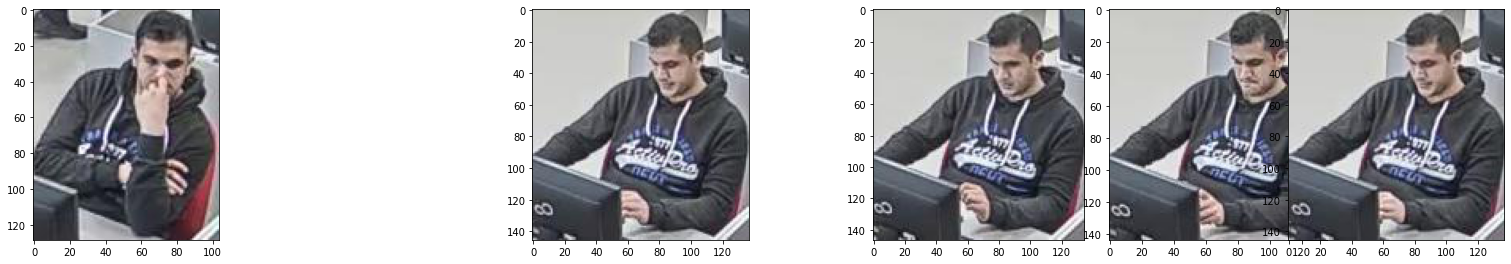

In [ ]:
#Ploting
r=10
k=1
c=4
fig = plt.figure(figsize=(50, 50))
for i in range(5):
  image = mpimg.imread(plot_images[i])
  fig.add_subplot(r, c, i+1)
  c=c+1
  plt.imshow(image)

In [ ]:
dp="/content/clustersevaluationdataset"
Folderpaths=os.listdir(dp)
LengthFolderPaths=len(Folderpaths)
os.mkdir("/content/Cluster")
for i in Folderpaths:
  #Foldername=int(os.path.basename(i))  # get the folder name
  Foldername=0
  dp="/content/clustersevaluationdataset/"+i                                 # path of the folder that I will work on
  imagepaths=os.listdir(dp)            # Listing the images paths inside the folder 
  images=[]
  for k in imagepaths:                 # Checking saving all images paths only
      if k.endswith('jpg'):
          x=os.path.abspath(os.path.join(dp,k))
          images.append(x)
# Clustering this folder
  for j in images:  # passing across all the images in the folder that I am working on
    try:
      # get the dataframe of the image j
      df = DeepFace.find(img_path = j, db_path =dp,detector_backend = 'mtcnn',model_name='ArcFace', distance_metric = 'cosine')
    except ValueError:
      continue
      # Dataframe to list
    df=df['identity'].tolist() #bta50d column ely feh paths
      #Creating new file if it does not exist
    file = pathlib.Path("/content/Cluster/"+str(Foldername))#be3ml file gded
      # edit the folder name for the future
    Foldername=Foldername+1
    if not file.exists(): #lw lfile m4 mwgod e3mlo
        os.mkdir(file)
    os.chdir(file)#ro7 llfile
      #ending of which folder will be worked on
      #saving the images that have the same person
    for imagepath in df:
      try:
        imagename=os.path.basename(imagepath)
        image = mpimg.imread(imagepath) #22ra sora sora  blpath bta3ha
        mpimg.imsave(imagename, image) #save lsora
        os.remove(imagepath)
        images.remove(imagepath)
      except ValueError:
        continue
      except FileNotFoundError:
        continue

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5


arcface_weights.h5  will be downloaded to  /root/.deepface/weights/arcface_weights.h5


100%|██████████| 137M/137M [00:01<00:00, 122MB/s]


Representations stored in  /content/clustersevaluationdataset/1 / representations_arcface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  25.788161993026733  seconds
Representations stored in  /content/clustersevaluationdataset/2 / representations_arcface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  4.185794353485107  seconds
Representations stored in  /content/clustersevaluationdataset/7 / representations_arcface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  1.2676196098327637  seconds
Representations stored in  /content/clustersevaluationdataset/3 / representations_arcface.pkl  file. Please delete this file when you add new identities in your database.
find function lasts  3.049274444580078  seconds
Representations stored in  /content/clustersevaluationdataset/5 / representations_arcface.pkl  file. Please delete this fi

In [ ]:
df = DeepFace.find(img_path = '/content/dataset/0.jpg', db_path ='/content/dataset',detector_backend = 'mtcnn',model_name='ArcFace', distance_metric = 'cosine')

ValueError: ignored

In [ ]:
df

,identity,ArcFace_cosine
0,/content/Cluster/0/0.jpg,0.000000
1,/content/Cluster/0/28.jpg,0.003694
2,/content/Cluster/0/47.jpg,0.003794
3,/content/Cluster/0/26.jpg,0.004375
4,/content/Cluster/0/3.jpg,0.004506
5,/content/Cluster/0/11.jpg,0.004514
6,/content/Cluster/0/29.jpg,0.004532
7,/content/Cluster/0/9.jpg,0.004636
8,/content/Cluster/0/10.jpg,0.004674
9,/content/Cluster/0/30.jpg,0.004806
